# EDA  

In [ ]:
!git clone https://github.com/sinbaramDL/dacon-credit-card-defaults-detection

In [ ]:
cd /content/dacon-credit-card-defaults-detection

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# seed 설정
np.random.seed(42)

sns.set_style("white")
sns.set_context("talk")

# 한글 사용 설정 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

In [3]:
train.describe(include='all')

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
count,26457.000000,26457,26457,26457,26457.000000,2.645700e+04,26457,26457,26457,26457,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,18286,26457.000000,26457.000000,26457.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN
freq,NaN,17697,16410,17830,NaN,NaN,13645,17995,18196,23653,NaN,NaN,NaN,NaN,NaN,NaN,4512,NaN,NaN,NaN
mean,13228.000000,NaN,NaN,NaN,0.428658,1.873065e+05,NaN,NaN,NaN,NaN,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,NaN,2.196848,-26.123294,1.519560
std,7637.622372,NaN,NaN,NaN,0.747326,1.018784e+05,NaN,NaN,NaN,NaN,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,NaN,0.916717,16.559550,0.702283
min,0.000000,NaN,NaN,NaN,0.000000,2.700000e+04,NaN,NaN,NaN,NaN,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,-60.000000,0.000000
25%,6614.000000,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,-39.000000,1.000000
50%,13228.000000,NaN,NaN,NaN,0.000000,1.575000e+05,NaN,NaN,NaN,NaN,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,-24.000000,2.000000
75%,19842.000000,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,-12.000000,2.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [5]:
train.head(10)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,-13413,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0
6,6,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,-17570,-1978,1,0,0,1,Core staff,1.0,-41.0,2.0
7,7,M,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14896,-5420,1,0,0,1,Drivers,2.0,-53.0,0.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
9,9,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-15785,-1308,1,0,0,0,Medicine staff,2.0,-5.0,2.0


In [6]:
#sns.pairplot(train)
#plt.title('Relationships between Features')
#plt.show()

# Feature Engineering

In [7]:
train = train.drop(["index"], axis=1)
test = test.drop(["index"], axis=1)

In [8]:
train[train.duplicated()]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
419,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-18820,-3185,1,0,1,0,Low-skill Laborers,2.0,-7.0,1.0
716,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21497,365243,1,0,0,0,NaN,1.0,-4.0,1.0
877,M,Y,N,2,180000.0,State servant,Secondary / secondary special,Married,House / apartment,-12240,-4663,1,0,0,0,Core staff,4.0,-24.0,2.0
1056,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24665,365243,1,0,0,0,NaN,2.0,-35.0,2.0
1315,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,-16137,-9391,1,0,1,0,Laborers,2.0,-29.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26374,F,Y,N,0,112500.0,Working,Secondary / secondary special,Married,Municipal apartment,-17372,-978,1,0,1,0,Sales staff,2.0,-15.0,1.0
26393,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-14122,-3383,1,0,0,0,Managers,2.0,-31.0,2.0
26428,F,Y,Y,2,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-12745,-525,1,0,0,1,Core staff,4.0,-23.0,1.0
26446,F,N,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-16300,-9698,1,0,0,1,Managers,2.0,-41.0,2.0


In [9]:
#train.drop_duplicates(subset=None, inplace=True)

In [10]:
train["FLAG_MOBIL"].value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

In [11]:
train = train.drop(["FLAG_MOBIL"], axis=1)
test = test.drop(["FLAG_MOBIL"], axis=1)
train['occyp_type'].fillna('OTHER',inplace = True)
test['occyp_type'].fillna('OTHER',inplace = True)

## Feature Creation

In [12]:
data = pd.concat([train, test], axis=0)
print(train.shape)
print(test.shape)
print(data.shape)

(26457, 18)
(10000, 17)
(36457, 18)


### occyp_type을 credit 평균치로 환산

In [13]:
occyp_mean_score = train.groupby(['occyp_type']).mean()['credit']
data['occyp_mean_score'] = data['occyp_type'].apply(lambda x : occyp_mean_score[x])
data[["occyp_mean_score", "occyp_type"]].describe(include='all')

,occyp_mean_score,occyp_type
count,36457.000000,36457
unique,NaN,19
top,NaN,OTHER
freq,NaN,11323
mean,1.519604,NaN
std,0.025978,NaN
min,1.365854,NaN
25%,1.502646,NaN
50%,1.526129,NaN
75%,1.526129,NaN


### house_type credit 평균치로 환산

In [14]:
occyp_mean_score = train.groupby(['house_type']).mean()['credit']
data['house_mean_score'] = data['house_type'].apply(lambda x : occyp_mean_score[x])
data[["house_mean_score", "house_type"]].describe(include='all')

,house_mean_score,house_type
count,36457.000000,36457
unique,NaN,6
top,NaN,House / apartment
freq,NaN,32548
mean,1.519568,NaN
std,0.013162,NaN
min,1.424242,NaN
25%,1.521625,NaN
50%,1.521625,NaN
75%,1.521625,NaN


### family related feature creation
1. 전체소득 / 가족수 --> 인당 인컴 수준
2. family_size - childnum --> 어른 수 linear해서 큰의미가 없을 것 같긴하지만 3을 위해서 활용
3. 전체소득 / 2에서 나온 것 --> 어른당 얼마정도 사용가능한지 연산

In [15]:
data['total_income/famliy_size'] = data['income_total']/(data['family_size']+1)
data['adult'] = data['family_size'] - data['child_num']
data['adult'] = data['adult'].apply(lambda x : x if x > 0.0 else 0)
data['total_income/adult'] = data['income_total'] / (data['adult'] + 1)
data[["income_total", "total_income/famliy_size", "adult"]].describe(include='all')

,income_total,total_income/famliy_size,adult
count,3.645700e+04,36457.000000,36457.000000
mean,1.866857e+05,62698.796579,1.768193
std,1.017892e+05,38442.131274,0.422512
min,2.700000e+04,5357.142857,0.000000
25%,1.215000e+05,37500.000000,2.000000
50%,1.575000e+05,52500.000000,2.000000
75%,2.250000e+05,78000.000000,2.000000
max,1.575000e+06,525000.000000,2.000000


### DAYS_BIRTH, DAYS_EMPLOYED, begin_month 처리

In [16]:
data["DAYS_EMPLOYED"] = -data["DAYS_EMPLOYED"]
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].apply(lambda x : x if x > 0.0 else 0)
data["DAYS_BIRTH"] = -data["DAYS_BIRTH"]
data["begin_month"] = -data["begin_month"]
data[["DAYS_EMPLOYED", "DAYS_BIRTH", "begin_month"]].describe(include="all")

,DAYS_EMPLOYED,DAYS_BIRTH,begin_month
count,36457.000000,36457.000000,36457.000000
mean,2200.317168,15975.173382,26.164193
std,2366.796762,4200.549944,16.501854
min,0.000000,7489.000000,-0.000000
25%,408.000000,12462.000000,12.000000
50%,1552.000000,15563.000000,24.000000
75%,3153.000000,19438.000000,39.000000
max,15713.000000,25152.000000,60.000000


### credit card 발급일 관련
1. when_begin_age = begin_month / Days_birth --> 나이대 대비 얼마쯤에 발급한 것인지
2. when_begin_employed = begin_month / Employed --> 고용된 것 대비 얼마만에 발급한 것인지
3. begin_income = begin_month / incometotal--> 버는 것 대비 빌린거는 얼마나 되었는지 --> 좀 이상하긴하네..
* 음.. 전처리부분이 고려가 안되어서 그거 고려해서 생각해야할 듯 함 일단 늘리기만 하기 오늘은 (employed - 3만 얼마인가 있음)
* 그리고 얘들은 구간을 나눠서 대표값으로 처리해버리면 더 안좋아질 수도 있을 것 같긴함

In [17]:
data['when_begin_age'] = data['begin_month'] / (data['DAYS_BIRTH'] + 1)
data['when_begin_employed'] = data['begin_month'] / (data['DAYS_EMPLOYED'] + 1)
data['begin_income'] = data['begin_month'] / (data['income_total'] + 1)
data[["when_begin_age", "when_begin_employed", "begin_income"]].describe(include="all")

,when_begin_age,when_begin_employed,begin_income
count,36457.000000,36457.000000,36457.000000
mean,0.001738,4.375079,0.000176
std,0.001190,11.867305,0.000153
min,-0.000000,-0.000000,-0.000000
25%,0.000753,0.006078,0.000065
50%,0.001562,0.015044,0.000137
75%,0.002518,0.059013,0.000242
max,0.006404,60.000000,0.001552


### 나이 관련
전처리에서 구간별로 나눠진 나이를 활용하면 아래의 적용이 힘들 것 같고 아래의 식은 기존의 컬럼 활용 구간별로 적용은 따로 한개 더 만드는게 좋을 듯 1. age_income = income_total / DAYS_BIRTH --> 나이대비 얼마나 버는지 2. age_employed = DAYS_EMPLOYED / DAYS_BIRTH --> 일한지는 살아생전에 얼만마 대는지? 3. DAYS_BIRTH / 365 --> 나이 연률화

In [18]:
data['income_age'] = data['income_total'] / (data['DAYS_BIRTH'] + 1)
data['employed_age'] = data['DAYS_EMPLOYED'] / (data['DAYS_BIRTH'] + 1)
data['yearly_age'] = data['DAYS_BIRTH'] // 365 
data[["income_age", "employed_age", "yearly_age"]].describe(include='all')

,income_age,employed_age,yearly_age
count,36457.000000,36457.000000,36457.000000
mean,12.634955,0.145746,43.260334
std,7.837546,0.140617,11.510414
min,1.268352,0.000000,20.000000
25%,7.425743,0.028465,34.000000
50%,11.021408,0.109490,42.000000
75%,15.912306,0.219059,53.000000
max,155.279503,0.694274,68.000000


### 고용 관련
전처리 부분에서 0,1로 고용유무로 구분하는 컬럼하나와 그냥 두는 컬럼 2개다 활용하는 것이 좋은 듯 함 고용기간 별구간나누는 것 까지는 잘 모르겠음 1. income_total / employed --> 고용된 것 대비 얼마나 버는지 2. DAYS_EMPLOYED /365 연률화

In [19]:
data['income_employed'] = data['income_total'] / (data['DAYS_EMPLOYED'] + 1)
data['yearly_employed'] = data['DAYS_EMPLOYED'] // 365
data[["income_employed", "yearly_employed"]].describe(include='all')

,income_employed,yearly_employed
count,36457.000000,36457.000000
mean,25168.630074,5.614560
std,63791.450776,6.417027
min,3.912760,0.000000
25%,54.519021,1.000000
50%,118.688772,4.000000
75%,463.121784,8.000000
max,742500.000000,43.000000


### AND 연산 뻥튀기
1. 차와 집 동시 소유 - 전처리에서 Y =1 N =0 으로 전처리 필요
2. 이메일과 전화 동시 소유 -> 그래도 가지고 있는애들이 소득이 조금 높아보이긴 하기 떄문에 활용

In [20]:
data['gender'] = data['gender'].replace(['F','M'], [0, 1])
data['car'] = data['car'].replace(['N', 'Y'], [0, 1])
data['reality'] = data['reality'].replace(['N', 'Y'], [0,1])
data['car&home'] = data['car'] * data['reality']
data['email&phone'] = data['email'] * data['phone']
data[["car&home", "email&phone"]].describe(include='all')

,car&home,email&phone
count,36457.000000,36457.000000
mean,0.251776,0.027814
std,0.434039,0.164441
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


### 총소득 관련
1. total_earned_money = income_total x (DAYS_EMPLOYED / 365) --> 이떄까지 번 것, DAYS_EMPLOYED가 양수로 바뀔 필요있을 것 같음
2. total/family = total_earned_money / family_num
3. total/age = total_earned_money / DAYS_BIRTH --> 나이대비 이때까지 얼마 벌었는지
4. log(income_total) --> 소득의 비선형성 고려

In [21]:
data['total_earned_money'] = data['income_total'] * (data['DAYS_EMPLOYED'] / 365)
data['total/family'] = data['total_earned_money'] / (data['family_size'] + 1)
data['total/age'] = data['total_earned_money'] / (data['DAYS_BIRTH'] + 1)
data['log_income'] = np.log(data['income_total'] + 1) 
data[["total_earned_money", "total/family", "total/age", "log_income"]].describe(include='all')

,total_earned_money,total/family,total/age,log_income
count,3.645700e+04,3.645700e+04,36457.000000,36457.000000
mean,1.182899e+06,3.916213e+05,78.051930,12.018808
std,1.531952e+06,5.483290e+05,93.412953,0.480501
min,0.000000e+00,0.000000e+00,0.000000,10.203629
25%,1.701370e+05,5.260274e+04,12.117571,11.707678
50%,6.912740e+05,2.159589e+05,49.604404,11.967187
75%,1.597808e+06,4.998082e+05,110.383891,12.323860
max,1.825644e+07,9.128219e+06,1054.624351,14.269766


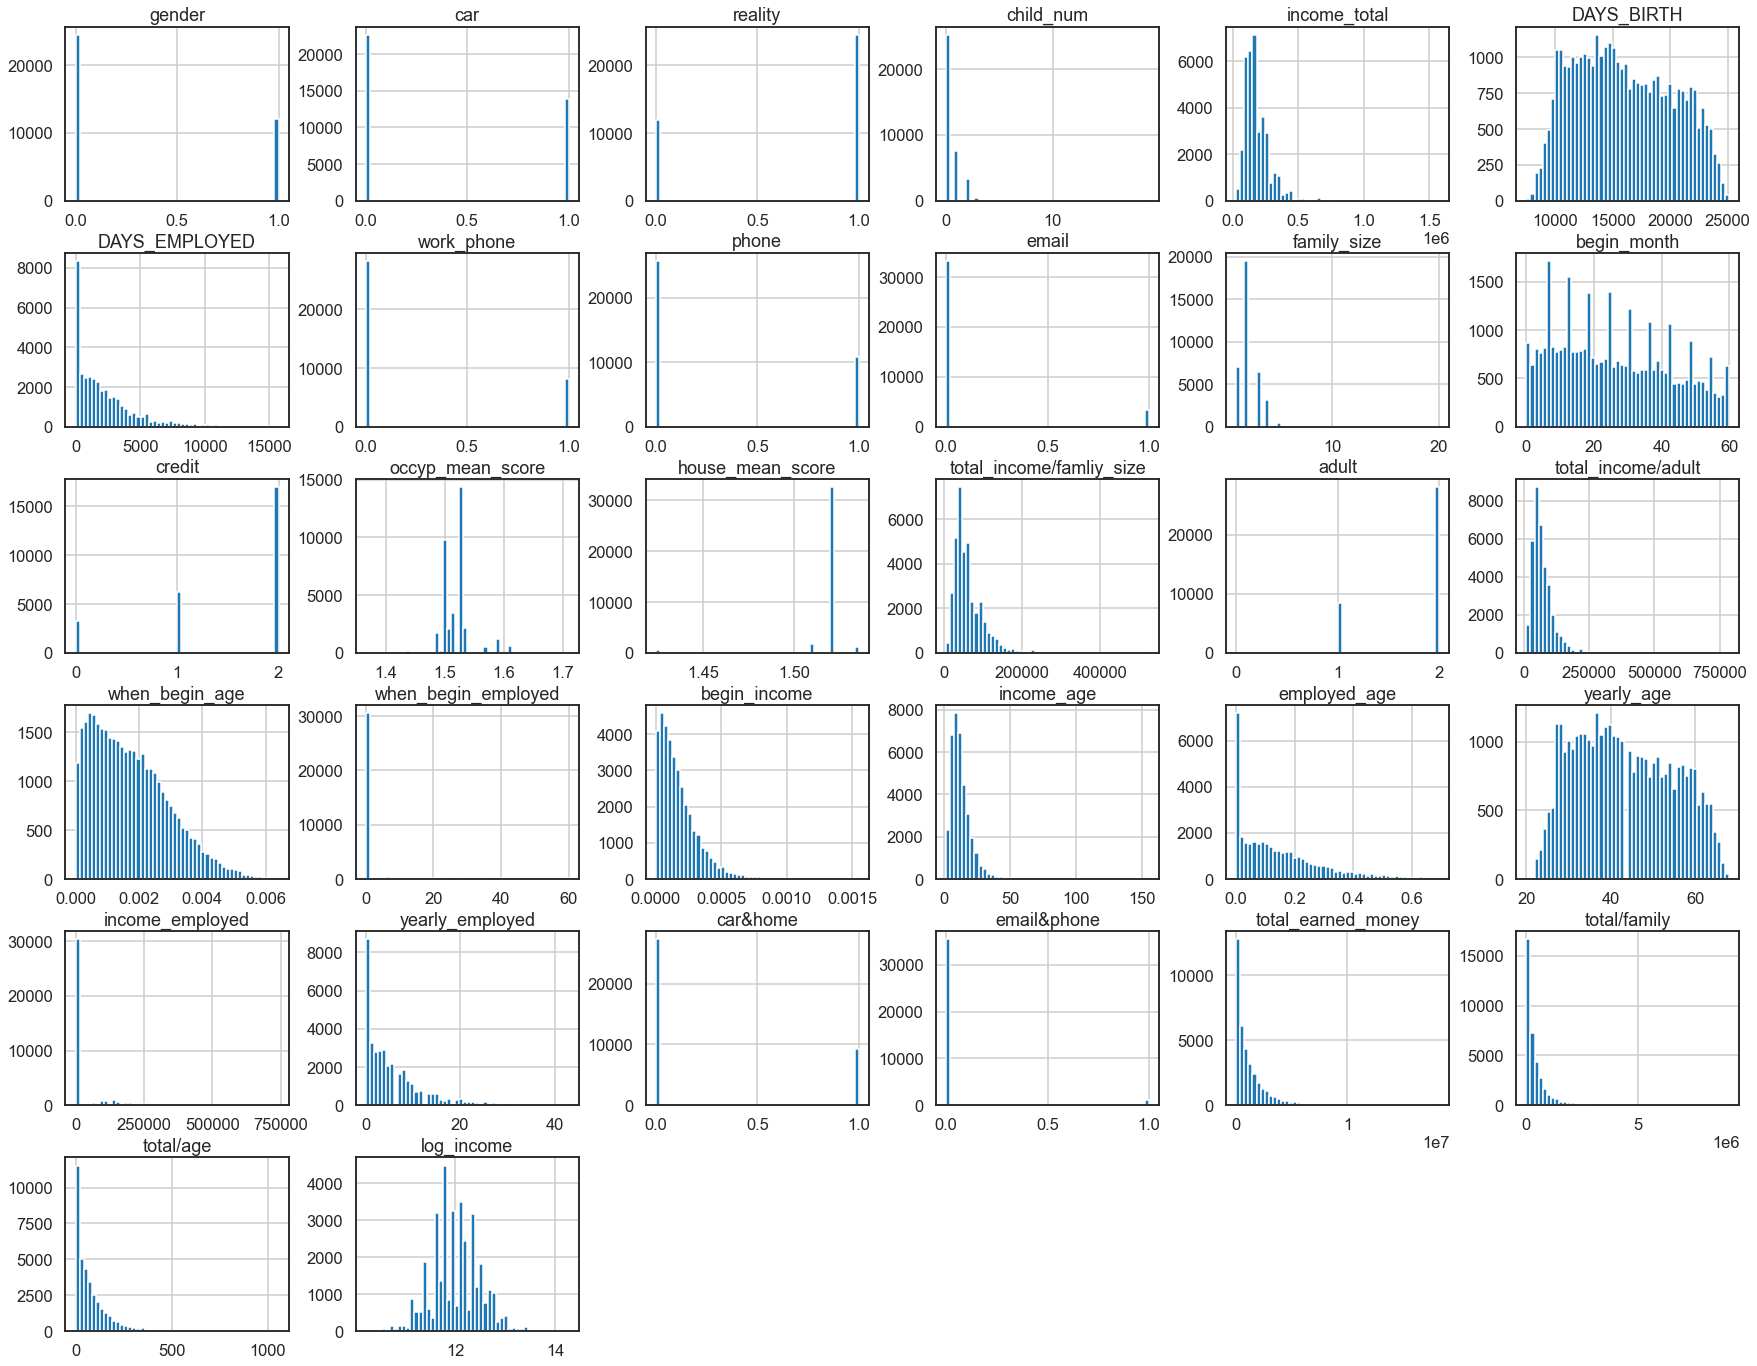

In [332]:
data.hist(bins=50, figsize=(30,24))
plt.show()

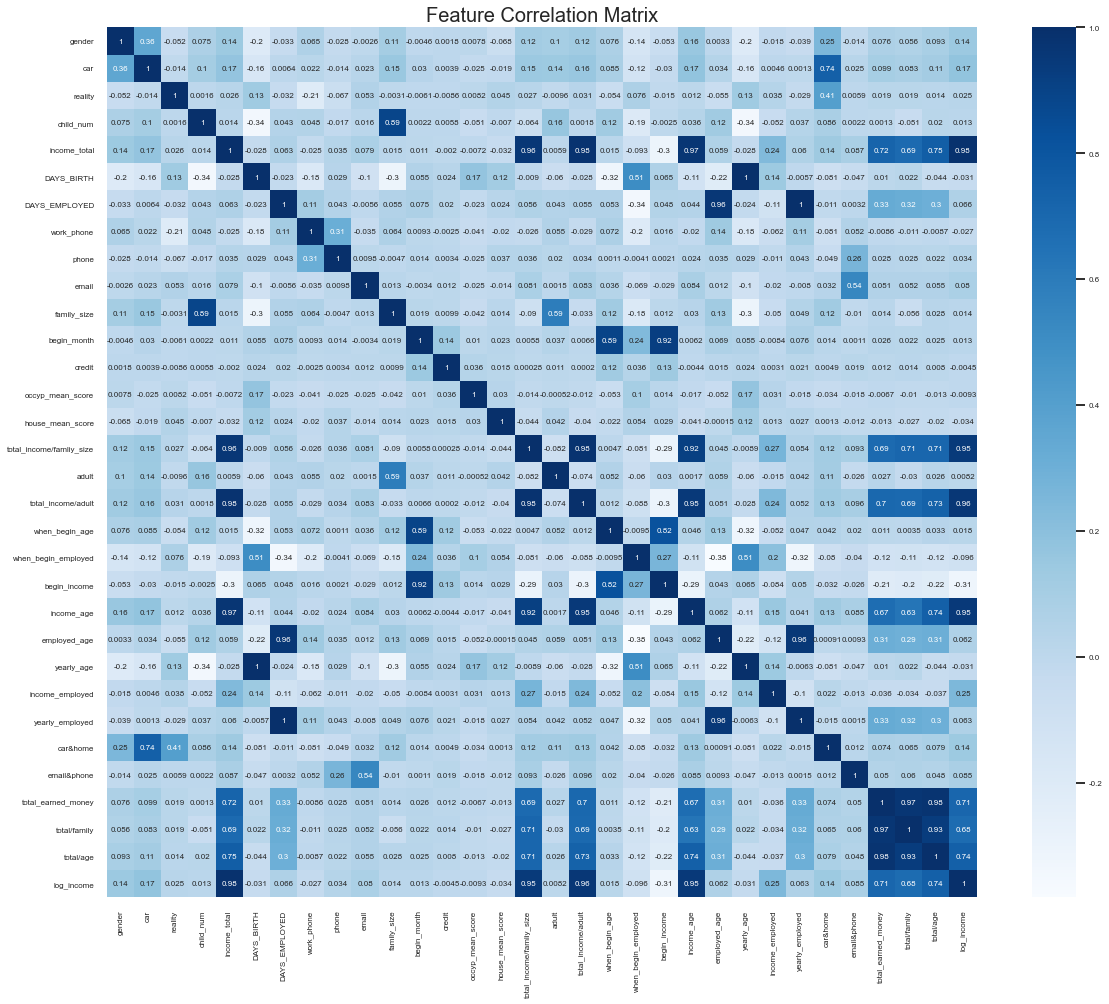

In [61]:
correlation_matrix = data.corr()
plt.figure(figsize=(20,16))
plt.rcParams.update({'font.size': 8})
plt.rc('axes', titlesize = 20) 
plt.rc('axes', labelsize = 10)
plt.rc('xtick', labelsize = 8)    
plt.rc('ytick', labelsize = 8)    
plt.rc('legend', fontsize = 8)    
plt.rc('figure', titlesize = 20)
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='Blues')
plt.title('Feature Correlation Matrix')
plt.show()

In [62]:
corr_matrix = data.corr()
corr_matrix["credit"].sort_values(ascending=False)

credit                      1.000000
begin_month                 0.143323
begin_income                0.134648
when_begin_age              0.124076
occyp_mean_score            0.036388
when_begin_employed         0.035558
DAYS_BIRTH                  0.024332
yearly_age                  0.024203
yearly_employed             0.020952
DAYS_EMPLOYED               0.019905
email&phone                 0.019350
house_mean_score            0.018000
employed_age                0.014528
total/family                0.013942
email                       0.012133
total_earned_money          0.011904
adult                       0.011327
family_size                 0.009937
total/age                   0.008006
child_num                   0.005825
car&home                    0.004899
car                         0.003883
phone                       0.003388
income_employed             0.003144
gender                      0.001787
total_income/famliy_size    0.000281
total_income/adult          0.000202
i

# Data Preprocessing

In [22]:
# preprocessing 이후 train set, test set split
#train=data[:len(data)-10000]
#test=data[len(data)-10000:]
#train.reset_index(inplace=True)
#test.reset_index(inplace=True)
train_x = train.drop("credit", axis = 1)
train_y = train['credit']
#test=test.drop('credit', axis=1)

## Nominal data proprocessing

In [23]:
object_col = []
for col in train.columns:
    if train[col].dtype == 'object':
        object_col.append(col)

## Label encoding (option 1)

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for header in object_col:
    train[header]   = label_encoder.fit_transform(train[header])
    test[header]    = label_encoder.fit_transform(test[header])

## object type들 one-hot encoding (option 2)

In [24]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(train.loc[:,object_col])
train_one_hot = pd.DataFrame(enc.transform(train.loc[:,object_col]).toarray(), columns=enc.get_feature_names(object_col))
train.drop(object_col, axis=1, inplace=True)
train = pd.concat([train, train_one_hot], axis=1)

enc = OneHotEncoder()
enc.fit(test.loc[:,object_col])
test_one_hot = pd.DataFrame(enc.transform(test.loc[:,object_col]).toarray(), columns=enc.get_feature_names(object_col))
test.drop(object_col, axis=1, inplace=True)
test = pd.concat([test, test_one_hot], axis=1)

## prprocessing numeric values

In [25]:
#numeric = ["income_total", "DAYS_BIRTH", "DAYS_EMPLOYED", "family_size", 
#            "begin_month", "total_income/famliy_size", "adult", "total_income/adult", 
#            "when_begin_age", "when_begin_employed", "begin_income", "income_age", 
#            "employed_age", "yearly_age", "income_employed", "yearly_employed", 
#            "total_earned_money", "total/family", "total/age", "log_income"]
#
#target = ["income_total", "DAYS_BIRTH", "DAYS_EMPLOYED", "begin_month", "total_income/famliy_size", "total_income/adult", "when_begin_age", "when_begin_employed", "begin_income",
#            "income_age", "employed_age", "income_employed", "yearly_employed", "total_earned_money", "total/family", "total/age", "log_income"]

target = ["income_total", "DAYS_BIRTH", "DAYS_EMPLOYED", "begin_month"]

train[target].describe(include='all')

,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
count,2.645700e+04,26457.000000,26457.000000,26457.000000
mean,1.873065e+05,-15958.053899,59068.750728,-26.123294
std,1.018784e+05,4201.589022,137475.427503,16.559550
min,2.700000e+04,-25152.000000,-15713.000000,-60.000000
25%,1.215000e+05,-19431.000000,-3153.000000,-39.000000
50%,1.575000e+05,-15547.000000,-1539.000000,-24.000000
75%,2.250000e+05,-12446.000000,-407.000000,-12.000000
max,1.575000e+06,-7705.000000,365243.000000,0.000000


### numeric value들 discretization (option 1)

In [46]:
def make_bin(variable, n):
    count, bin_dividers = np.histogram(train[variable], bins=n)
    bin_names = [str(i) for i in range(n)]
    train[variable] = pd.cut(x=train[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    train[variable] = label_encoder.fit_transform(train[variable])
    test[variable] = pd.cut(x=test[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable] = label_encoder.fit_transform(test[variable])

make_bin('DAYS_BIRTH', n=10)
make_bin('DAYS_EMPLOYED', n=6)
make_bin('begin_month', n=4)
make_bin('income_total', n=7)

#for header in target:
#    make_bin(header, 7)

### numeric value들 normalization (zero mean, unit variance) (option 2)

In [60]:
def normalize(data, header):
    if header in data.columns:
        data[header] = (data[header] - data[header].mean()) / data[header].std()
    return data

for header in target:
    train = normalize(train, header)
    test = normalize(test, header)

In [26]:
train.describe(include='all')

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,...,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_OTHER,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,...,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560,...,0.004800,0.081906,0.032657,0.308841,0.009185,0.002381,0.095967,0.003666,0.016026,0.004687
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283,...,0.069119,0.274227,0.177740,0.462024,0.095398,0.048741,0.294552,0.060440,0.125578,0.068301
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
from sklearn.ensemble import ExtraTreesClassifier

train_x = train.drop("credit", axis = 1)
train_y = train['credit']

etc_model = ExtraTreesClassifier()
etc_model.fit(train_x, train_y)

print(etc_model.feature_importances_)
#featuer_importances의 순서대로 끝에서 몇개는 제외시키는 것으로 
#어느정도의 irrelevant feature는 걸러낼수 있을듯합니다
order = sorted(range(len(etc_model.feature_importances_)), key=lambda k: etc_model.feature_importances_[k])
etc_model.feature_importances_[order]

[2.36194269e-02 1.01104571e-01 1.15227500e-01 7.09406628e-02
 1.77371731e-02 2.16054255e-02 1.21108998e-02 2.54637174e-02
 3.71327906e-01 1.01070116e-02 1.04414446e-02 9.27417377e-03
 9.28670628e-03 8.54356918e-03 8.60150281e-03 7.92723815e-03
 1.97377823e-03 6.65690165e-03 1.89080586e-04 9.42359987e-03
 2.73208899e-04 9.85536439e-03 4.61120936e-03 1.59741587e-03
 1.02815635e-02 5.61430853e-03 6.73853973e-03 4.69168642e-03
 5.27783169e-03 3.11805312e-03 1.06871374e-03 7.61122324e-03
 3.85895681e-03 1.63102699e-03 2.41369759e-03 5.00594859e-03
 5.00277355e-03 2.46449701e-03 3.86112656e-03 8.46782762e-03
 5.71802650e-03 7.08814399e-04 5.98766544e-03 5.62710848e-04
 1.05195006e-02 1.38537504e-03 7.53202770e-03 4.15240771e-03
 1.10528479e-02 2.36894269e-03 9.20872939e-04 8.45772013e-03
 1.15502772e-03 2.75143036e-03 1.71936809e-03]


array([1.89080586e-04, 2.73208899e-04, 5.62710848e-04, 7.08814399e-04,
       9.20872939e-04, 1.06871374e-03, 1.15502772e-03, 1.38537504e-03,
       1.59741587e-03, 1.63102699e-03, 1.71936809e-03, 1.97377823e-03,
       2.36894269e-03, 2.41369759e-03, 2.46449701e-03, 2.75143036e-03,
       3.11805312e-03, 3.85895681e-03, 3.86112656e-03, 4.15240771e-03,
       4.61120936e-03, 4.69168642e-03, 5.00277355e-03, 5.00594859e-03,
       5.27783169e-03, 5.61430853e-03, 5.71802650e-03, 5.98766544e-03,
       6.65690165e-03, 6.73853973e-03, 7.53202770e-03, 7.61122324e-03,
       7.92723815e-03, 8.45772013e-03, 8.46782762e-03, 8.54356918e-03,
       8.60150281e-03, 9.27417377e-03, 9.28670628e-03, 9.42359987e-03,
       9.85536439e-03, 1.01070116e-02, 1.02815635e-02, 1.04414446e-02,
       1.05195006e-02, 1.10528479e-02, 1.21108998e-02, 1.77371731e-02,
       2.16054255e-02, 2.36194269e-02, 2.54637174e-02, 7.09406628e-02,
       1.01104571e-01, 1.15227500e-01, 3.71327906e-01])

In [28]:
train.columns[order][:10]

Index(['income_type_State servant', 'income_type_Working',
       'occyp_type_High skill tech staff', 'occyp_type_Drivers',
       'occyp_type_Private service staff', 'family_type_Widow',
       'occyp_type_Sales staff', 'occyp_type_Laborers',
       'edu_type_Incomplete higher', 'house_type_Municipal apartment'],
      dtype='object')

# Model Selection

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier, plot_importance
import torch
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.multitask import TabNetMultiTaskClassifier

def model_experiment(tx, ty):
    logloss = {}
    logloss["Gradient Boosting"] = {}
    logloss["Light GBM"] = {}
    logloss["TabNet"] = {}

    X_train, X_val, Y_train, Y_val = train_test_split(tx, ty,stratify=ty, test_size=0.25, random_state=10086)
    y_val_onehot = pd.get_dummies(Y_val)

    print("Start Gradient Boosting")
    gb_param_grid = {
        'n_estimators' : [100, 200],
        'max_depth' : [8, 10, 12],
        'min_samples_leaf' : [5, 7, 10],
        'min_samples_split' : [2, 3, 5],
        'learning_rate' : [0.05, 0.1, 0.2]
    }
    gb = GradientBoostingClassifier()
    gb.fit(X_train, Y_train)
    predict = gb.predict_proba(X_val)
    logloss["Gradient Boosting"] = {"model" : gb, "logloss" : log_loss(y_val_onehot, predict)}
    print("End Gradient Boosting")

    print("Start Light GBM")
    lgb = LGBMClassifier(boosting="dart", metric="multiclass", n_estimators=1000, feature_fraction=0.5, bagging_fraction=0.5)
    lgb.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_val, Y_val)], verbose=100)
    predict = lgb.predict_proba(X_val)
    y_val_onehot = pd.get_dummies(Y_val)
    logloss["LGBM"] = {"model" : lgb, "logloss" : log_loss(y_val_onehot, predict)}
    print("End Light GBM")

    return logloss

In [73]:
logloss = model_experiment(train_x, train_y)
print(logloss)

Start Gradient Boosting
End Gradient Boosting
Start Light GBM
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[100]	training's multi_logloss: 0.736358	valid_1's multi_logloss: 0.787278
[200]	training's multi_logloss: 0.701173	valid_1's multi_logloss: 0.774472
[300]	training's multi_logloss: 0.668956	valid_1's multi_logloss: 0.763799
[400]	training's multi_logloss: 0.640982	valid_1's multi_logloss: 0.755481
[500]	training's multi_logloss: 0.612176	valid_1's multi_logloss: 0.749765
[600]	training's multi_logloss: 0.600785	valid_1's multi_logloss: 0.74797
[700]	training's multi_logloss: 0.580336	valid_1's multi_logloss: 0.746044
[800]	training's multi_logloss: 0.566711	valid_1's multi_logloss:

In [74]:
class_weights = 1.0 / train_y.value_counts()
class_weights = torch.Tensor(class_weights.to_numpy()).cuda()
class_weights

tensor([5.8934e-05, 1.5957e-04, 3.1037e-04], device='cuda:0')

In [75]:
X_train, X_val, Y_train, Y_val = train_test_split(train_x, train_y,stratify=train_y, test_size=0.25, random_state=10086)
y_val_onehot = pd.get_dummies(Y_val)

unsupervised_model = TabNetPretrainer(
    n_d=16, n_a=16, n_steps=5,
    lambda_sparse=1e-2,
    gamma = 1.3,
    optimizer_fn = torch.optim.Adam,
    optimizer_params = dict(lr=2e-2),
    scheduler_params = {"gamma": 0.9, "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    device_name='cuda'
)
unsupervised_model.fit(
    X_train = X_train.values,
    eval_set = [X_val.values],
    pretraining_ratio=0.8
)
clf = TabNetMultiTaskClassifier(
    n_d=16, n_a=16, n_steps=5,
    lambda_sparse=1e-2,
    gamma = 1.3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2),
    scheduler_params = {"gamma": 0.8, "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    device_name='cuda'
)
clf.fit(
X_train = X_train.values, y_train = np.array(Y_train).reshape(Y_train.shape[0],1),
    eval_set = [(X_val.values, np.array(Y_val).reshape(Y_val.shape[0],1))],
    max_epochs=300,
    patience=50,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    loss_fn = torch.nn.CrossEntropyLoss(class_weights),
    from_unsupervised=unsupervised_model,
    drop_last=False
)
predict = clf.predict_proba(X_val.values)
log_loss(y_val_onehot, predict[0])

Device used : cuda
epoch 0  | loss: 38192393.19746| val_0_unsup_loss: 51.30096|  0:00:03s
epoch 1  | loss: 3301514.3274| val_0_unsup_loss: 7.85481 |  0:00:07s
epoch 2  | loss: 883945.86897| val_0_unsup_loss: 3.97635 |  0:00:11s
epoch 3  | loss: 158205.05487| val_0_unsup_loss: 2.83967 |  0:00:15s
epoch 4  | loss: 21031.38585| val_0_unsup_loss: 1.91545 |  0:00:18s
epoch 5  | loss: 1694.74314| val_0_unsup_loss: 1.88981 |  0:00:22s
epoch 6  | loss: 1038.06344| val_0_unsup_loss: 1.9276  |  0:00:26s
epoch 7  | loss: 331.92171| val_0_unsup_loss: 1.92751 |  0:00:29s
epoch 8  | loss: 591.54264| val_0_unsup_loss: 1.92751 |  0:00:33s
epoch 9  | loss: 108.00023| val_0_unsup_loss: 1.92751 |  0:00:36s
epoch 10 | loss: 18.20399| val_0_unsup_loss: 1.92751 |  0:00:40s
epoch 11 | loss: 13.60411| val_0_unsup_loss: 1.92751 |  0:00:44s
epoch 12 | loss: 20.67677| val_0_unsup_loss: 1.92751 |  0:00:47s
epoch 13 | loss: 2.02529 | val_0_unsup_loss: 1.92751 |  0:00:51s
epoch 14 | loss: 672.81352| val_0_unsup_los

0.9092219204080129

In [32]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

def gb_objective(trial: Trial):
    gb_param_grid = {
        'n_estimators' : trial.suggest_int("n_estimators", 100, 200),
        'max_depth' : trial.suggest_int("max_depth", 8, 12),
        'min_samples_leaf' : trial.suggest_int("min_samples_leaf", 5, 10),
        'min_samples_split' : trial.suggest_int("min_samples_split", 2, 5),
        'learning_rate' : trial.suggest_float("learning_rate", 0.05, 0.2)
    }

    X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, stratify=train_y, test_size=0.25, random_state=10086)

    gb = GradientBoostingClassifier(**gb_param_grid)
    gb.fit(X_train, y_train)
    predict = gb.predict_proba(X_valid)
    y_val_onehot = pd.get_dummies(y_valid)
    logloss = log_loss(y_val_onehot, predict)

    return logloss

def lgbm_objective(trial: Trial):
    params_lgb = {
        "random_state": 42,
        "verbosity": -1,
        "learning_rate": 0.05,
        "n_estimators": 10000,
        "objective": "multiclass",
        "metric": "multi_logloss",
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 3e-5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 9e-2),
        "max_depth": trial.suggest_int("max_depth", 1, 20),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "subsample": trial.suggest_float("subsample", 0.3, 1.0),
        "subsample_freq": trial.suggest_int("subsample_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "max_bin": trial.suggest_int("max_bin", 200, 500),
    }
    
    X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, stratify=train_y, test_size=0.25, random_state=10086)

    model = LGBMClassifier(**params_lgb)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        early_stopping_rounds=100,
        verbose=False,
    )

    lgb_pred = model.predict_proba(X_valid)
    log_score = log_loss(y_valid, lgb_pred)
    
    return log_score

def tabnet_objective(trial: Trial):
    params_tabnet = {
        "n_d":trial.suggest_int("n_d", 8, 64),
        "n_a":trial.suggest_int("n_a", 8, 64),
        "n_steps":trial.suggest_int("n_steps", 3, 10),
        "gamma": trial.suggest_float("gamma", 1, 2),
        "lambda_sparse": trial.suggest_float("lambda_sparse", 1e-6, 1e-2),
        "optimizer_fn":torch.optim.Adam,
        "optimizer_params": {"lr": trial.suggest_float("lr", 1e-3, 1e-1)},
        "scheduler_params": {"gamma": trial.suggest_float("gamma", 0.7, 0.95), "step_size": trial.suggest_int("step_size", 10, 20)},
        "scheduler_fn":torch.optim.lr_scheduler.StepLR,
        "mask_type":'entmax',
        "device_name":'cuda'
    }
    
    X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, stratify=train_y, test_size=0.25, random_state=10086)

    clf = TabNetMultiTaskClassifier(**params_tabnet)
    clf.fit(
    X_train = X_train.values, y_train = np.array(Y_train).reshape(Y_train.shape[0],1),
        eval_set = [(X_val.values, np.array(Y_val).reshape(Y_val.shape[0],1))],
        max_epochs=300,
        patience=50,
        batch_size=1024,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False
    )
    predict = clf.predict_proba(X_val.values)
    log_score = log_loss(y_val_onehot, predict[0])
    
    return log_score

In [30]:
sampler = TPESampler(seed=42)
gb_study = optuna.create_study(
    study_name="gradient_boost_parameter_opt",
    direction="minimize",
    sampler=sampler,
)
gb_study.optimize(gb_objective, n_trials=5)
print("Best Score:", gb_study.best_value)
print("Best trial:", gb_study.best_trial.params)

[I 2021-05-22 18:33:43,679] A new study created in memory with name: lgbm_parameter_opt
[W 2021-05-22 18:33:43,682] Trial 0 failed because of the following error: NameError("name 'train_test_split' is not defined")
Traceback (most recent call last):
  File "C:\Users\sinji\AppData\Local\Programs\Python\Python38\lib\site-packages\optuna\_optimize.py", line 217, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-29-eedfceeb16d3>", line 14, in gb_objective
    X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, stratify=train_y, test_size=0.25, random_state=10086)
NameError: name 'train_test_split' is not defined


NameError: name 'train_test_split' is not defined

In [ ]:
sampler = TPESampler(seed=42)
lgbm_study = optuna.create_study(
    study_name="lgbm_parameter_opt",
    direction="minimize",
    sampler=sampler,
)
lgbm_study.optimize(lgbm_objective, n_trials=5)
print("Best Score:", lgbm_study.best_value)
print("Best trial:", lgbm_study.best_trial.params)

In [ ]:
sampler = TPESampler(seed=42)
tabnet_study = optuna.create_study(
    study_name="tabnet_parameter_opt",
    direction="minimize",
    sampler=sampler,
)
tabnet_study.optimize(tabnet_objective, n_trials=5)
print("Best Score:", tabnet_study.best_value)
print("Best trial:", tabnet_study.best_trial.params)

In [24]:
predict = clf.predict_proba(test.values)

In [95]:
i, j, k = [], [], []
for row in range(10000):
  i.append(predict[0][row][0])
  j.append(predict[0][row][1])
  k.append(predict[0][row][2])

len(i), len(j), len(k)
submission = pd.read_csv("datasets/sample_submission.csv")
submission['0'] = i
submission['1'] = j
submission['2'] = k
submission.head(10)

,index,0,1,2
0,26457,0.127674,0.352821,0.519506
1,26458,0.491692,0.172754,0.335554
2,26459,0.264395,0.246672,0.488933
3,26460,0.137494,0.287106,0.575400
4,26461,0.202316,0.301616,0.496069
5,26462,0.164515,0.424144,0.411341
6,26463,0.786075,0.211745,0.002180
7,26464,0.517908,0.184011,0.298081
8,26465,0.126518,0.258081,0.615401
9,26466,0.345562,0.229969,0.424470


In [96]:
submission.to_csv("datasets/submisison_tabnet.csv",index=False)